In [1]:
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.transforms import LocalDegreeProfile
from torch_geometric.data import Data

from master_thesis.tools.plots import draw_network
from master_thesis.classification_models.base_model import BaseModel

In [2]:
!pwd

/Users/wciezobka/sano/projects/masters-thesis/master_thesis/notebooks


In [3]:
def describe_network(network):
    print(f"Network shape: {network.shape}")
    print(f"Values range: {np.min(network)} - {np.max(network)}")
    plt.imshow(network, cmap="gray")
    plt.show()

In [4]:
sample_rcc = np.load("../../Datasets/NeuroFlicksRCC/networks/sub-CON001A.npy")[0]
sample_gc = np.load("../../Datasets/NeuroFlicksGC/networks/sub-CON001A.npy")[0]
sample_synthetic = np.load("../../Datasets/Synthetic/ScaleFreeBias/networks/class_a_0.npy")

networks = {
    "RCC": sample_rcc,
    "GC": sample_gc,
    "Synthetic": sample_synthetic
}

RCC
Network shape: (100, 100)
Values range: 0.0 - 1.499868192663662


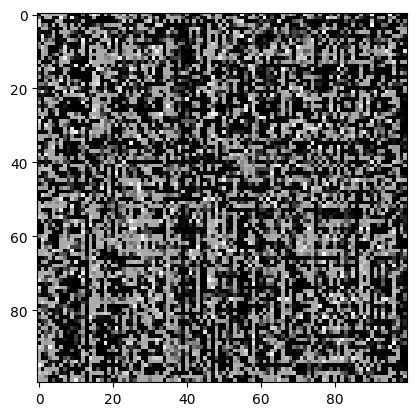

GC
Network shape: (100, 100)
Values range: 0.0 - 1.0


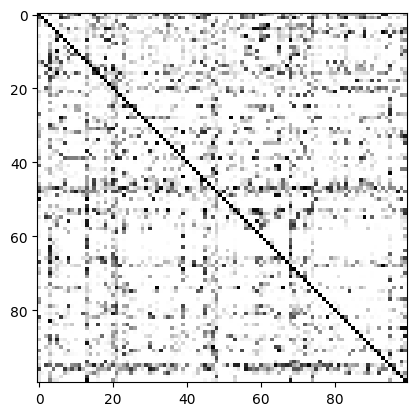

Synthetic
Network shape: (100, 100)
Values range: 0.0 - 1.0


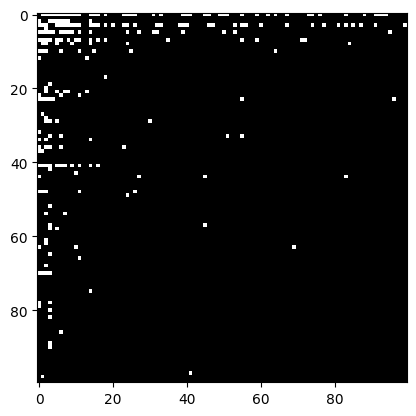

In [5]:
for name, network in networks.items():
    print(name)
    describe_network(network)

RCC
Network shape: (100, 100)
Values range: 0.0 - 1.499868192663662


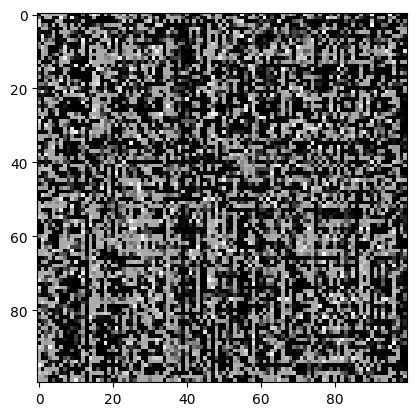

GC
Network shape: (100, 100)
Values range: 0.0 - 1.0


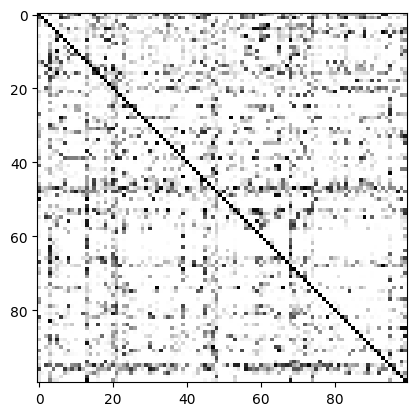

Synthetic
Network shape: (100, 100)
Values range: 0.0 - 1.0


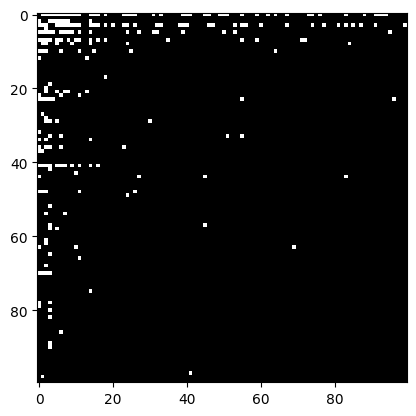

In [6]:
for name, network in networks.items():
    print(name)
    describe_network(network)

## LDP

In [7]:
sample_synthetic_nx = nx.from_numpy_array(sample_synthetic, create_using=nx.DiGraph)
sample_synthetic_geo = BaseModel.nx2geometric("cpu", sample_synthetic_nx, 0)

edges_nx = np.array(list(sample_synthetic_nx.edges))
edges_geo = sample_synthetic_geo.edge_index.T.numpy()

assert np.all(edges_nx == edges_geo)

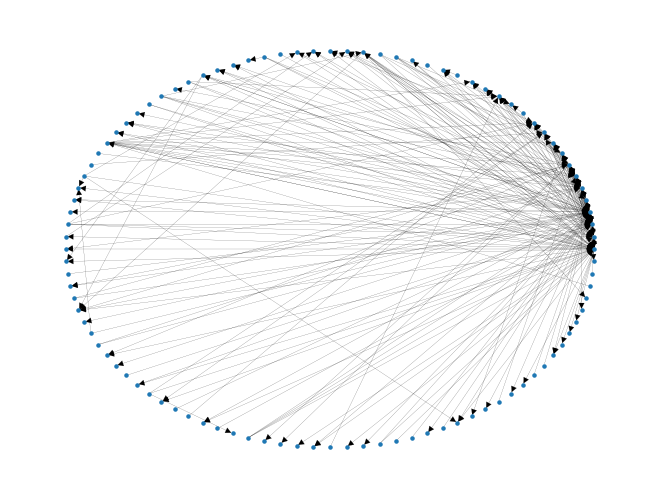

In [11]:
draw_network(sample_synthetic_nx)

In [28]:
g = sample_synthetic_geo
g.x

In [29]:
g = LocalDegreeProfile()(g)
g

Data(edge_index=[2, 235], y=[1], num_nodes=100, num_edges=235, x=[100, 5])

In [30]:
num_features = 0 if g.x is None else g.x.shape[1]
num_features

5

In [38]:
g.x[:, 0:].shape[1]

5

In [39]:
def aggregate_ldp(data: Data) -> np.ndarray:
    n_features = data.x.shape[1]
    x = [np.histogram(data.x[:, i], bins=10, density=True)[0] for i in range(n_features)]
    x = np.concatenate(x, axis=0)
    return x

In [46]:
ldps = [aggregate_ldp(g) for i in range(4)]
ldps = np.stack(ldps, axis=0)
ldps.shape

(4, 50)